# Improtação das bibliotecas

In [87]:
from google.cloud import bigquery
from google.auth import impersonated_credentials, default
from datetime import timedelta
import os
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import time

# Estrutura da tabela que vamos usar nas comparações

In [138]:
print("Tamanho dos dados:",polars_dataset.shape)
polars_dataset.head()

Tamanho dos dados: (10000000, 4)


id,cidade,estado,pais
str,str,str,str
"""1""","""Campinas""","""São Paulo""","""Brasil"""
"""2""","""São Paulo""","""São Paulo""","""Brasil"""
"""3""","""Sacramento""","""Califórnia""","""EUA"""
"""4""","""Melbourne""","""Vitória""","""Austrália"""
"""5""","""Dhali""","""Tamil Nadu""","""Índia"""


# Funções importantes usadas no código

## Variáveis de ambiente usadas

In [92]:
project_id = os.environ.get("PROJECT_ID")
dataset_id =  os.environ.get("DATASET_ID")
table_id = os.environ.get("TABLE_ID")

In [106]:
def polars_big_query():
    client = bigquery.Client(project=project_id)
    
    query = f"SELECT id, cidade, estado, país FROM `{project_id}.{dataset_id}.{table_id}` limit 10000000"
    
    query_job = client.query(query)
    rows = query_job.result()
    data = pl.from_arrow(rows.to_arrow())
    client.close()
    print(data.shape)
    return data

In [107]:
def pandas_gbq_query():
    client = bigquery.Client(project=project_id)
    table_ref = client.dataset(dataset_id, project=project_id).table(table_id)
    table = client.get_table(table_ref)

    query = f"SELECT id, cidade, estado, pais FROM `{project_id}.{dataset_id}.{table_id}` limit 10000000"

    query_job = client.query(query)
    data = query_job.to_dataframe()
    print(data.shape)
    return data

In [108]:
def pandas_query():
    client = bigquery.Client(project=project_id)
    table_ref = client.dataset(dataset_id, project=project_id).table(table_id)
    table = client.get_table(table_ref)
    query = f"SELECT id, cidade, estado, país FROM `{project_id}.{dataset_id}.{table_id}` limit 10000000"

    query_job = client.query(query)
    data = query_job.to_dataframe()
    print(data.shape)
    return data

# Consultas e Comparações

### Variável temposQueries: Guarda o tempo em segundos de 15 execuções para cada biblioteca usada
- 1ª linha: **Polars**
- 2ª linha: **Pandas-Gbq**
- 3ª linha: **Pandas**

Cada linha terá sua média feita e armazenada na variável **mediasQueries**, depois plotaremos os dados em um gráfico para análise

In [57]:
temposQueries = np.zeros((3, 15))
temposQueries

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [58]:
mediasQueries = np.zeros((3))
mediasQueries

array([0., 0., 0.])

<font size= "3">
Cada query está sendo avaliada com <b>10 milhões de itens</b>, pra não acabar usando 100% da memória RAM do usuário.
<br/><br/>
A análise será baseada no cálculo de 10mi x 15 = 150mi de dados, considerando que o tempo será <b>constante</b> para a mesma quantidade de dados sempre, <b>mas sabemos que pode variar um pouco, tanto para mais quanto para menos</b>.
</font>

## Usando a biblioteca Polars com o BigQuery

In [59]:
for i in range(0,15):
    print("Iteração:",i)
    start_time = time.monotonic()
    polars_dataset = polars_big_query()
    end_time = time.monotonic()
    tempo = timedelta(seconds=end_time - start_time)
    temposQueries[0,i] = 15 * tempo.total_seconds()
mediasQueries[0] = np.mean(temposQueries[0])
print("Média de 15 buscas usando o Polars, medido em segundos:",mediasQueries[0])

Iteração: 0
Iteração: 1
Iteração: 2
Iteração: 3
Iteração: 4
Iteração: 5
Iteração: 6
Iteração: 7
Iteração: 8
Iteração: 9
Iteração: 10
Iteração: 11
Iteração: 12
Iteração: 13
Iteração: 14
Média de 15 buscas usando o Polars, medido em segundos: 285.062


## Usando a biblioteca Pandas-gbq com o BigQuery

In [60]:
for i in range(0,15):
    print("Iteração:",i)
    start_time = time.monotonic()
    pandas_gbq_dataset = pandas_gbq_query()
    end_time = time.monotonic()
    tempo = timedelta(seconds=end_time - start_time)
    temposQueries[1,i] = 15 * tempo.total_seconds()
mediasQueries[1] = np.mean(temposQueries[1])
print("Média de 15 buscas usando o Pandas-gbq, medido em segundos:",mediasQueries[1])

Iteração: 0
Iteração: 1
Iteração: 2
Iteração: 3
Iteração: 4
Iteração: 5
Iteração: 6
Iteração: 7
Iteração: 8
Iteração: 9
Iteração: 10
Iteração: 11
Iteração: 12
Iteração: 13
Iteração: 14
Média de 15 buscas usando o Pandas-gbq, medido em segundos: 305.57800000000003


## Usando a biblioteca Pandas com o BigQuery

In [61]:
for i in range(0,15):
    print("Iteração:",i)
    start_time = time.monotonic()
    pandas_dataset = pandas_query()
    end_time = time.monotonic()
    tempo = timedelta(seconds=end_time - start_time)
    temposQueries[2,i] = 15 * tempo.total_seconds()
mediasQueries[2] = np.mean(temposQueries[2])
print("Média de 15 buscas usando o Pandas, medido em segundos:",mediasQueries[2])

Iteração: 0
Iteração: 1
Iteração: 2
Iteração: 3
Iteração: 4
Iteração: 5
Iteração: 6
Iteração: 7
Iteração: 8
Iteração: 9
Iteração: 10
Iteração: 11
Iteração: 12
Iteração: 13
Iteração: 14
Média de 15 buscas usando o Pandas, medido em segundos: 329.93800000000005


## Plotagem de Gráficos

### Valores de cada execução a serem usados no gráfico de linhas:

In [100]:
temposQueries

array([[316.395, 309.15 , 307.02 , 285.48 , 251.715, 235.305, 272.115,
        288.045, 269.775, 281.01 , 273.51 , 277.98 , 276.795, 350.385,
        281.25 ],
       [317.82 , 317.805, 305.16 , 327.195, 297.645, 305.625, 307.035,
        300.945, 301.875, 319.215, 294.6  , 283.83 , 306.795, 297.435,
        300.69 ],
       [668.67 , 310.32 , 307.725, 302.58 , 304.455, 309.615, 299.775,
        302.1  , 302.355, 304.92 , 305.625, 307.965, 301.41 , 321.09 ,
        300.465]])

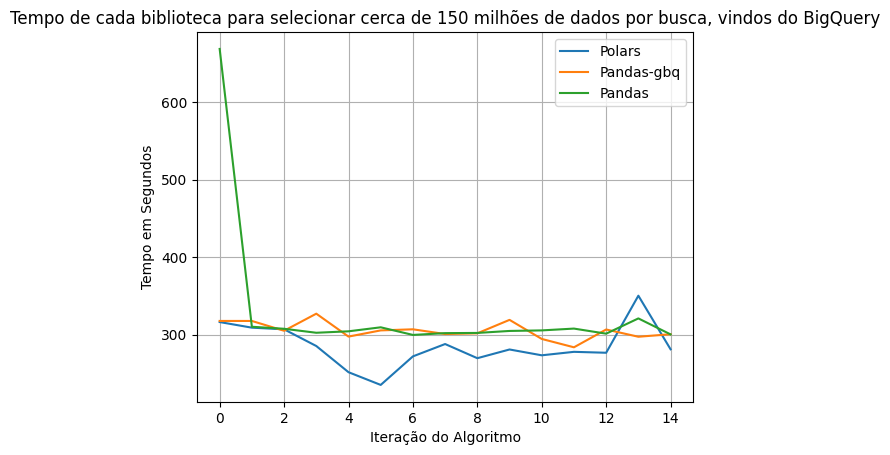

In [101]:
labels = ["Polars","Pandas-gbq","Pandas"]
x_values = np.arange(temposQueries.shape[1])
for i in range(temposQueries.shape[0]):
    plt.plot(x_values, temposQueries[i], label=labels[i])  # Plot each row as a separate line

plt.xlabel('Iteração do Algoritmo')
plt.ylabel('Tempo em Segundos')
plt.title('Tempo de cada biblioteca para selecionar cerca de 150 milhões de dados por busca, vindos do BigQuery')

plt.legend()
plt.grid(True)
plt.show()

<font size= "3">
    Com o gráfico acima, podemos perceber alguns detalhes importantes sobre as buscas de cada biblioteca usada:
    <br/>
    <ul>
        <li>O Pandas teve um tempo de execução inicial <b>muito mais alto que o Polars</b> -> 668,67seg x 316,395seg, pouco mais que o dobro, porém, após isso, o algoritmo teve seu fluxo de tempo constante praticamente, com <b>pequenas variações</b> de segundos.</li>
        <br/>
        <li>O Pandas-gbq teve um início em cerca de 317,82seg e se manteve com <b>poucas variações</b> também, tendo sua maior variação com pouco menos que 30 segundos, entre a 3ª e 4ª iteração.</li>
        <br/>
        <li>O Polars teve as <b>maiores oscilações</b> que pudemos ver, assim como os <b>menores valores</b> de tempo alcançados, com um mínimo de <b>235,305seg</b> e máximo de <b>350seg</b>.
            <ul>
                <li>
                    Além disso, em sua 13ª iteração, ele foi o <b>campeão</b> no tempo de execução.
                </li>
            </ul>
        </li>
    </ul>
</font>

### Valores médios de cada biblioteca que serão usados no gráfico de colunas: 

In [102]:
mediasQueries

array([285.062, 305.578, 329.938])

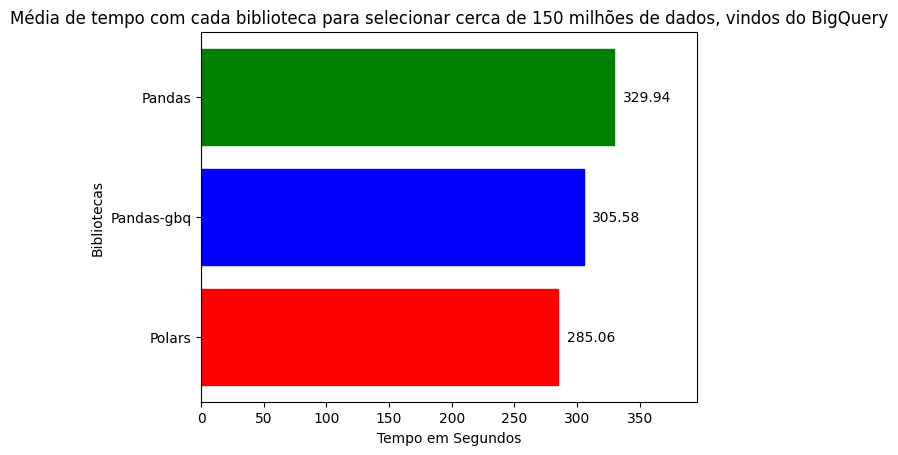

In [113]:
y_values = ["Polars","Pandas-gbq","Pandas"]
colors = ['red', 'blue', 'green']
bars = plt.barh(y_values, mediasQueries)

for i, value in enumerate(mediasQueries):
    bars[i].set_color(colors[i])
    plt.text(value + max(data) * 0.02, i, f'{value:.2f}', ha='left', va='center')

plt.xlim(0, max(data) * 1.2)

plt.xlabel('Tempo em Segundos')
plt.ylabel('Bibliotecas')
plt.title('Média de tempo com cada biblioteca para selecionar cerca de 150 milhões de dados, vindos do BigQuery')
plt.show()

<font size= "3">
    A análise do gráfico revela que a biblioteca Polars se sobressaiu como a opção <b>mais eficaz</b> entre as três para conduzir uma busca em uma tabela do BigQuery com <b>150 milhões de registros</b>.
    <br/><br/>
    O desempenho médio do Polars destacou-se ao ser cerca de <b>20 segundos</b> mais rápido que o Pandas-gbq e quase <b>50 segundos</b> mais veloz que o Pandas, evidenciando ser mais veloz no processamento de dados massivos.
</font>

## Bônus: Conversão de dataframe Polars para Pandas e Pandas para Polars 

### Tá precisando converter um dataframe Polars para Pandas? Saca só!

In [120]:
pd_dataset_convertido = polars_dataset.to_pandas()
print(type(pd_dataset_convertido))
print(pd_dataset_convertido.shape)

<class 'pandas.core.frame.DataFrame'>
(10000000, 4)


### Tá precisando criar um dataframe Polars baseado em um do Pandas? Olha que demais!

In [119]:
pl_dataset_convertido = pl.from_pandas(pd_dataset_convertido)
print(type(pl_dataset_convertido))
print(pd_dataset_convertido.shape)

<class 'polars.dataframe.frame.DataFrame'>
(10000000, 4)


# Conclusão


<font size= "3">
    Desse modo, podemos afirmar que o Polars é, de fato, uma <b>biblioteca extremamente versátil e de fácil manipulação</b>. Sua notável rapidez na execução de tarefas é acompanhada pela sua capacidade de atender a uma variedade de necessidades que podemos ter no decorrer de um projeto, principalmente quando queremos <b>carregar e manipular dados rapidamente</b>. 
    <br/><br/>
    Além disso, o Polars oferece a flexibilidade da converter um DataFrame Polars para um DataFrame Pandas e <b>vice-versa também</b>, permitindo que programadores utilizem ambas as bibliotecas e tirem proveito das vantagens de desempenho específicas de cada uma.
    <br/><br/>
    Essa abordagem proporciona a possibilidade de <b>escolher a melhor solução</b>, aproveitando o desempenho superior de cada biblioteca para obter resultados rápidos e eficientes, de acordo com o contexto e aplicação que está sendo feita.
</font>